## Modelo de Classificação

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('emp_automovel.csv')

In [4]:
df.head(5)

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [5]:
# separando features e target

x = df.drop(['inadimplente'], axis=1)

y = df['inadimplente']

In [12]:
from sklearn.tree import DecisionTreeClassifier 

arvore = DecisionTreeClassifier()

arvore.fit(x ,y)

print(f' Acuracia: {arvore.score(x,y)*100}')

 Acuracia: 100.0


**TREINO, TESTE, VALIDACAO**

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=5)

In [ ]:
modelo = DecisionTreeClassifier()

modelo.fit(x_treino,y_treino)
print(f'Acuracia do treino:{modelo.score(x_treino, y_treino)}')
print(f'Acuracia da validacao:{modelo.score(x_val, y_val)}')

Acuracia do treino:1.0
Acuracia da validacao:0.8480968556745928


**PARAMETRO**

In [21]:
modelo = DecisionTreeClassifier(max_depth=10)

modelo.fit(x_treino,y_treino)
print(f'Acuracia do treino:{modelo.score(x_treino, y_treino)}')
print(f'Acuracia da validacao:{modelo.score(x_val, y_val)}')

Acuracia do treino:0.9205574912891986
Acuracia da validacao:0.9057573382109573


**AVALIANDO O MODELO**

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = modelo.predict(x_val)

matriz_confusao = confusion_matrix(y_val, y_pred)
print(matriz_confusao)

[[10359   120]
 [  962    40]]


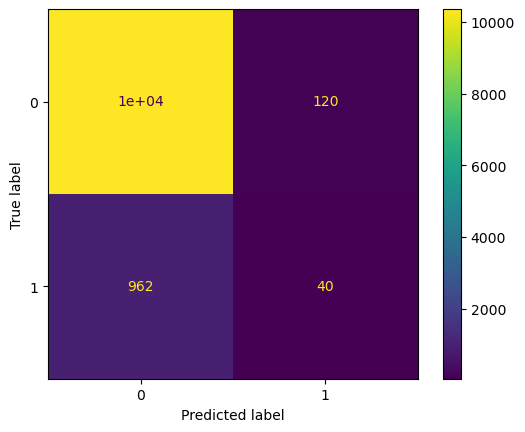

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
visualizao.plot();

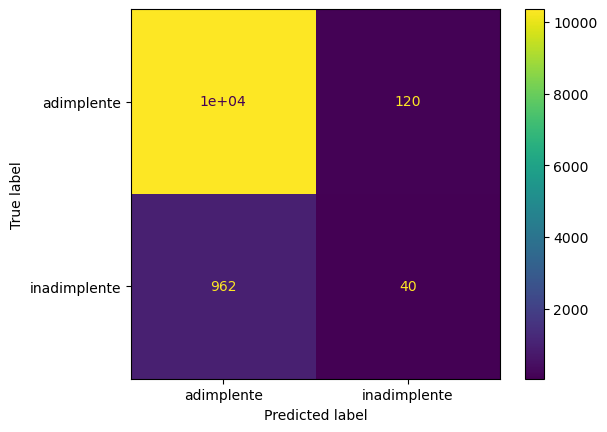

In [25]:
visualizao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['adimplente','inadimplente'])
visualizao.plot();